In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install basemap

In [2]:
yt = pd.read_csv('Global YouTube Statistics.csv', encoding='latin-1')

In [3]:
print(yt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1006 non-null   int64  
 1   Youtuber                                 1006 non-null   object 
 2   subscribers                              1003 non-null   float64
 3   video views                              1006 non-null   float64
 4   category                                 951 non-null    object 
 5   Title                                    1006 non-null   object 
 6   uploads                                  1006 non-null   int64  
 7   Country of origin                        881 non-null    object 
 8   Country                                  881 non-null    object 
 9   Abbreviation                             881 non-null    object 
 10  channel_type                             974 non

In [4]:
print(yt.describe())

              rank   subscribers   video views        uploads  \
count  1006.000000  1.003000e+03  1.006000e+03    1006.000000   
mean    497.472167  2.319501e+07  1.112411e+10    9168.335984   
std     288.738758  1.783047e+07  1.424148e+10   34028.189437   
min       1.000000  1.230000e+07  0.000000e+00       0.000000   
25%     247.250000  1.450000e+07  4.281427e+09     194.000000   
50%     498.500000  1.770000e+07  7.751292e+09     726.500000   
75%     748.750000  2.475000e+07  1.357357e+10    2606.500000   
max     995.000000  2.450000e+08  2.280000e+11  301308.000000   

       video_views_rank  country_rank  channel_type_rank  \
count      1.005000e+03    887.000000         971.000000   
mean       5.607670e+05    384.289741         742.311020   
std        1.368886e+06   1227.359768        1938.126477   
min        1.000000e+00      1.000000           1.000000   
25%        3.220000e+02     11.000000          26.000000   
50%        9.190000e+02     50.000000          65.0000

In [5]:
print(yt.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    55
Title                                        0
uploads                                      0
Country of origin                          125
Country                                    125
Abbreviation                               125
channel_type                                32
video_views_rank                             1
country_rank                               119
channel_type_rank                           35
video_views_for_the_last_30_days            57
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               340
created_year                                 5
created_month

#1.	What are the top 10 YouTube channels based on the number of subscribers?

In [6]:
subs_sorted = yt.sort_values(by='subscribers', ascending=False)
top_10 = subs_sorted.head(10)
print(top_10[['rank','Youtuber','subscribers','Title']])

   rank                    Youtuber  subscribers                       Title
0     1                    T-Series  245000000.0                    T-Series
1     2              YouTube Movies  170000000.0               youtubemovies
2     3                     MrBeast  166000000.0                     MrBeast
3     4  Cocomelon - Nursery Rhymes  162000000.0  Cocomelon - Nursery Rhymes
4     5                   SET India  159000000.0                   SET India
5     6                       Music  119000000.0                       Music
6     7         ýýý Kids Diana Show  112000000.0         ýýý Kids Diana Show
7     8                   PewDiePie  111000000.0                   PewDiePie
8     9                 Like Nastya  106000000.0            Like Nastya Vlog
9    10               Vlad and Niki   98900000.0               Vlad and Niki


In [7]:
subs_sorted = yt.sort_values(by='subscribers', ascending=False)
top_10 = subs_sorted.head(10)
print(top_10[['rank','Youtuber','highest_monthly_earnings','lowest_monthly_earnings']])

   rank                    Youtuber  highest_monthly_earnings  \
0     1                    T-Series                9000000.00   
1     2              YouTube Movies                      0.05   
2     3                     MrBeast                5400000.00   
3     4  Cocomelon - Nursery Rhymes                7900000.00   
4     5                   SET India                7300000.00   
5     6                       Music                      0.00   
6     7         ýýý Kids Diana Show                2900000.00   
7     8                   PewDiePie                 156700.00   
8     9                 Like Nastya                 195800.00   
9    10               Vlad and Niki                2300000.00   

   lowest_monthly_earnings  
0                 564600.0  
1                      0.0  
2                 337000.0  
3                 493800.0  
4                 455900.0  
5                      0.0  
6                 182900.0  
7                   9800.0  
8                  1220

In [8]:
subs_sorted = yt.sort_values(by='subscribers', ascending=False)
top_10 = subs_sorted.head(10)
print(top_10[['rank','Youtuber','highest_yearly_earnings','lowest_yearly_earnings']])

   rank                    Youtuber  highest_yearly_earnings  \
0     1                    T-Series             1.084000e+08   
1     2              YouTube Movies             5.800000e-01   
2     3                     MrBeast             6.470000e+07   
3     4  Cocomelon - Nursery Rhymes             9.480000e+07   
4     5                   SET India             8.750000e+07   
5     6                       Music             0.000000e+00   
6     7         ýýý Kids Diana Show             3.510000e+07   
7     8                   PewDiePie             1.900000e+06   
8     9                 Like Nastya             2.300000e+06   
9    10               Vlad and Niki             2.790000e+07   

   lowest_yearly_earnings  
0              6800000.00  
1                    0.04  
2              4000000.00  
3              5900000.00  
4              5500000.00  
5                    0.00  
6              2200000.00  
7               117600.00  
8               146800.00  
9              

In [9]:
yt_1 = yt.drop_duplicates()
views_sorted = yt.sort_values(by='video views', ascending=False)
top_10 = views_sorted.head(10)
print(top_10[['rank','Youtuber','video views','Title']])

     rank                    Youtuber   video views  \
0       1                    T-Series  2.280000e+11   
3       4  Cocomelon - Nursery Rhymes  1.640000e+11   
4       5                   SET India  1.480000e+11   
15     16                    Sony SAB  1.010000e+11   
6       7         ýýý Kids Diana Show  9.324704e+10   
8       9                 Like Nastya  9.047906e+10   
995    12                         WWE  7.742847e+10   
11     12                         WWE  7.742847e+10   
9      10               Vlad and Niki  7.718017e+10   
21     22                      Zee TV  7.313905e+10   

                          Title  
0                      T-Series  
3    Cocomelon - Nursery Rhymes  
4                     SET India  
15                     Sony SAB  
6           ýýý Kids Diana Show  
8              Like Nastya Vlog  
995                         WWE  
11                          WWE  
9                 Vlad and Niki  
21                       Zee TV  


In [10]:
print(yt['category'].unique())

['Music' 'Film & Animation' 'Entertainment' 'Education' 'Shows' nan
 'People & Blogs' 'Gaming' 'Sports' 'Howto & Style' 'News & Politics'
 'Comedy' 'Trailers' 'Nonprofits & Activism' 'Science & Technology'
 'Movies' 'Pets & Animals' 'Autos & Vehicles' 'Travel & Events']


<ipython-input-11-4a4317a8412c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_counts.index, y=cat_counts.values, palette='magma')


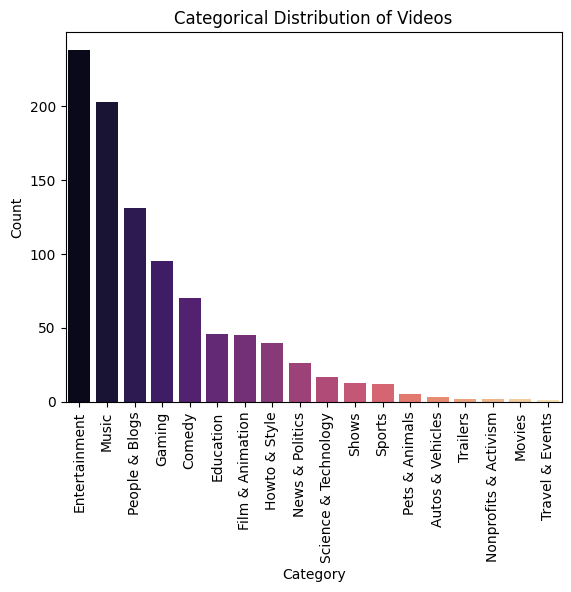

In [11]:
cat_counts = yt['category'].value_counts()
sns.barplot(x=cat_counts.index, y=cat_counts.values, palette='magma')
plt.title('Categorical Distribution of Videos')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#2.	Which category has the highest average number of subscribers?

In [12]:
yt_1 = yt[yt['subscribers'] != 0]
avgsubs_by_category = yt_1.groupby('category')['subscribers'].mean().sort_values(ascending=False)
print(avgsubs_by_category)
print("Category with the highest average number of subscribers : " + avgsubs_by_category.index[0])

category
Shows                    4.161538e+07
Trailers                 3.900000e+07
Sports                   3.285000e+07
Nonprofits & Activism    2.775000e+07
Film & Animation         2.762727e+07
Education                2.712391e+07
Music                    2.604926e+07
Movies                   2.565000e+07
Entertainment            2.153840e+07
Gaming                   2.086170e+07
News & Politics          2.063077e+07
People & Blogs           2.053130e+07
Comedy                   2.002571e+07
Howto & Style            1.935750e+07
Science & Technology     1.861765e+07
Pets & Animals           1.732000e+07
Autos & Vehicles         1.660000e+07
Travel & Events          1.250000e+07
Name: subscribers, dtype: float64
Category with the highest average number of subscribers : Shows


#3. How many videos, on average, are uploaded by YouTube channels in each category?

In [13]:
yt_1 = yt[yt['subscribers'] != 0]
avgvid_by_category = yt_1.groupby('category')['uploads'].mean().round().astype(int)
print(avgvid_by_category)

category
Autos & Vehicles           1551
Comedy                     1203
Education                  3087
Entertainment             12052
Film & Animation           2862
Gaming                     4285
Howto & Style              1696
Movies                     3553
Music                      2326
News & Politics          112484
Nonprofits & Activism    102912
People & Blogs             9257
Pets & Animals             3563
Science & Technology       2114
Shows                     27444
Sports                    19130
Trailers                   6839
Travel & Events             766
Name: uploads, dtype: int64


#4.	What are the top 5 countries with the highest number of YouTube channels?

In [14]:
top_5 = yt.groupby('Country')['Youtuber'].count().sort_values(ascending=False).head(5)
print(top_5)

Country
United States     315
India             170
Brazil             62
United Kingdom     44
Mexico             33
Name: Youtuber, dtype: int64


In [15]:
count = yt.groupby('Country')['Youtuber'].count().sort_values(ascending=False)
print(count)

Country
United States           315
India                   170
Brazil                   62
United Kingdom           44
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Saudi Arabia             10
Australia                 9
Ukraine                   8
United Arab Emirates      8
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Sweden                    4
Singapore                 4
Turkey                    4
Jordan                    3
Netherlands               3
Chile                     3
Vietnam                   3
Italy                     2
Iraq                      2
Egypt                     2
Ecuador                   2
Switzerland               1
Venezuela                 1
Afghanistan 

#5.	What is the distribution of channel types across different categories?

In [16]:
ch_cat = yt.groupby(['category','channel_type'])['Youtuber'].count()
print(ch_cat)
print(yt['channel_type'].unique())
print(yt['category'].unique())

category          channel_type 
Autos & Vehicles  Autos             2
                  Entertainment     1
Comedy            Comedy           39
                  Entertainment    20
                  Film              1
                                   ..
Sports            Entertainment     1
                  Sports           11
Trailers          Entertainment     1
                  Music             1
Travel & Events   Entertainment     1
Name: Youtuber, Length: 79, dtype: int64
['Music' 'Games' 'Entertainment' 'Education' 'People' 'Sports' 'Film'
 'News' nan 'Comedy' 'Howto' 'Nonprofit' 'Autos' 'Tech' 'Animals']
['Music' 'Film & Animation' 'Entertainment' 'Education' 'Shows' nan
 'People & Blogs' 'Gaming' 'Sports' 'Howto & Style' 'News & Politics'
 'Comedy' 'Trailers' 'Nonprofits & Activism' 'Science & Technology'
 'Movies' 'Pets & Animals' 'Autos & Vehicles' 'Travel & Events']


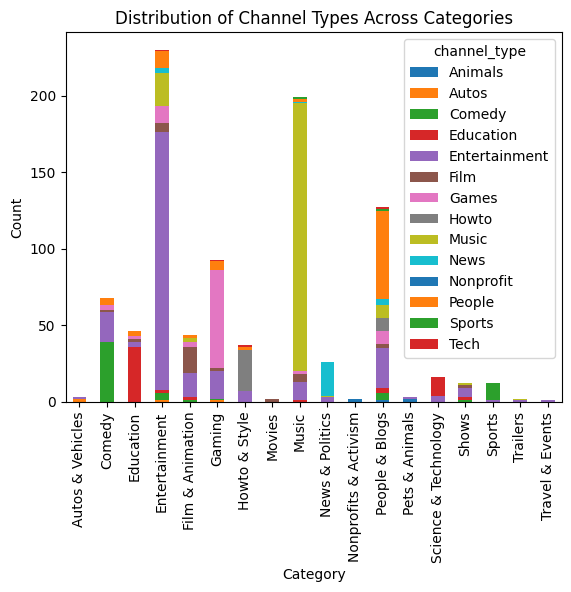

In [17]:
distribution = yt.groupby(['category', 'channel_type']).size().unstack(fill_value=0)
distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Channel Types Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


#6.	Is there a correlation between the number of subscribers and total video views for YouTube channels?

Correlation between subscribers and video views: 0.7481786016237689


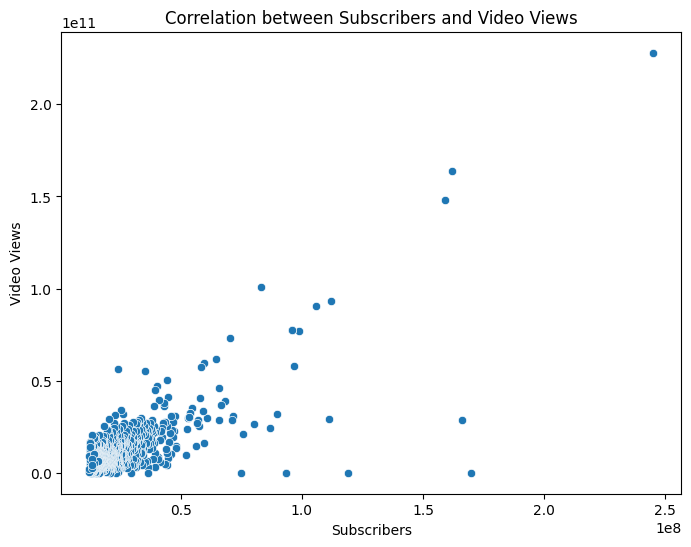

In [18]:
# prompt: Is there a correlation between the number of subscribers and total video views for YouTube channels?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
yt = pd.read_csv('Global YouTube Statistics.csv', encoding='latin-1')

# Calculate the correlation coefficient
correlation = yt['subscribers'].corr(yt['video views'])
print("Correlation between subscribers and video views:", correlation)

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='subscribers', y='video views', data=yt)
plt.title('Correlation between Subscribers and Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.show()


In [19]:
sub_view_corr = yt['subscribers'].corr(yt['video views'])
print(sub_view_corr)


0.7481786016237689


#7.	How do the monthly earnings vary throughout different categories?

<ipython-input-20-240a8cb2726d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_earnings_dist.index, y=monthly_earnings_dist.values, palette='viridis')


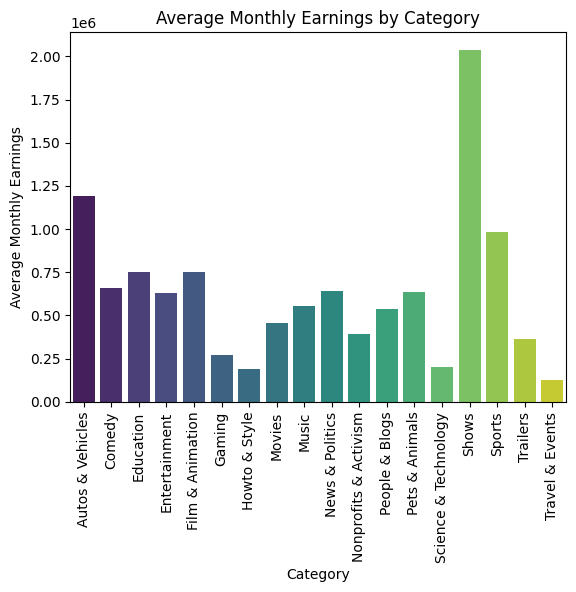

In [20]:
monthly_earnings_dist = yt.groupby('category')['highest_monthly_earnings'].mean()
sns.barplot(x=monthly_earnings_dist.index, y=monthly_earnings_dist.values, palette='viridis')
plt.title('Average Monthly Earnings by Category')
plt.xlabel('Category')
plt.ylabel('Average Monthly Earnings')
plt.xticks(rotation=90)
plt.show()

#8. What is the overall trend in subscribers gained in the last 30 days across all channels?


In [21]:
mean_sub_gain = yt['subscribers_for_last_30_days'].mean()
highest = yt['subscribers_for_last_30_days'].max()
ch_highest = yt[yt['subscribers_for_last_30_days'] == highest]['Title'].values
lowest = yt['subscribers_for_last_30_days'].min()
ch_lowest = yt[yt['subscribers_for_last_30_days'] == lowest]['Title'].values
print(f"Average Subscribers Gained: {mean_sub_gain}")
print(f"Highest Subscribers Gained: {highest}")
print("Channels with highest subscribers Gained: ",*ch_highest)
print(f"Lowest Subscribers Gained: {lowest}")
print("Channels with least subscribers Gained:")
print(*ch_lowest[0:8], sep = ", ")
print(*ch_lowest[8:len(ch_lowest)], sep = ", ")

Average Subscribers Gained: 349541.85285285284
Highest Subscribers Gained: 8000000.0
Channels with highest subscribers Gained:  MrBeast
Lowest Subscribers Gained: 1.0
Channels with least subscribers Gained:
brightside, MrBeastGaming, drake, Sandeepmaheshwari, FaZeRug, Alan Becker, deddycorbuzier, cKn
Ajay Sharma, deepesh zo, Extra polinesios, nobru, TrapCity, Tom Duggan, straykids, Ryan Trahan


#9. Are there any outliers in terms of yearly earnings from YouTube channels?

In [22]:
print(yt.isnull().sum()[['lowest_monthly_earnings','highest_monthly_earnings']])
print(yt.describe()[['lowest_monthly_earnings','highest_monthly_earnings']])

lowest_monthly_earnings     0
highest_monthly_earnings    0
dtype: int64
       lowest_monthly_earnings  highest_monthly_earnings
count              1006.000000              1.006000e+03
mean              37034.348489              5.922453e+05
std               71869.653679              1.148967e+06
min                   0.000000              0.000000e+00
25%                2700.000000              4.340000e+04
50%               13250.000000              2.117000e+05
75%               38125.000000              6.101750e+05
max              850900.000000              1.360000e+07


#10. What is the distribution of channel creation dates? Is there any trend over time?

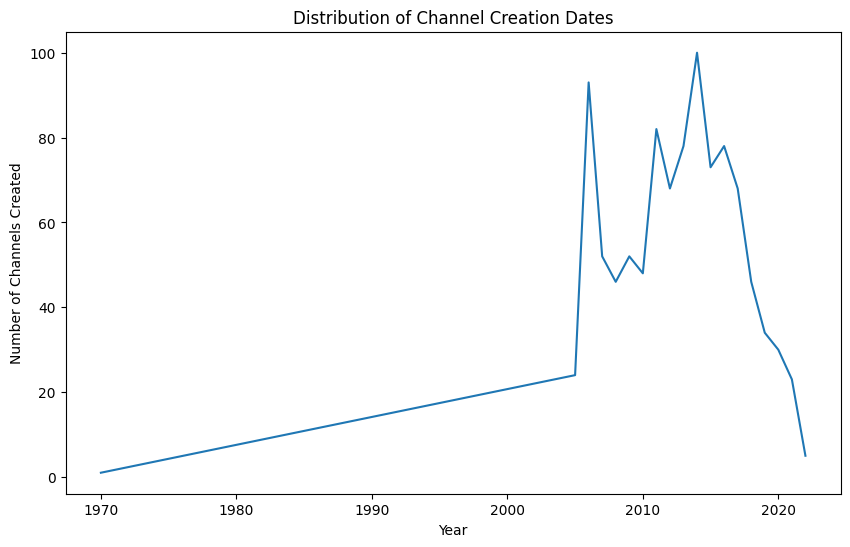

In [23]:
yt['created_year'] = pd.to_datetime(yt['created_year'], format='%Y')
time_trend = yt.groupby('created_year')['Youtuber'].count()
plt.figure(figsize=(10, 6))
plt.plot(time_trend.index, time_trend.values)
plt.title('Distribution of Channel Creation Dates')
plt.xlabel('Year')
plt.ylabel('Number of Channels Created')
plt.show()


#11. Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

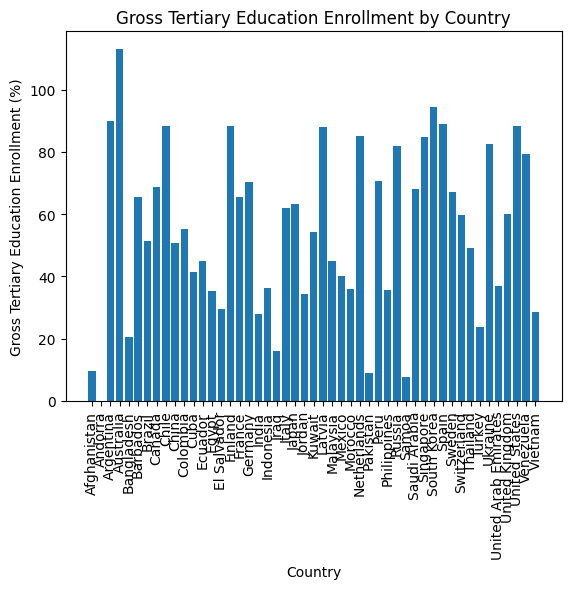

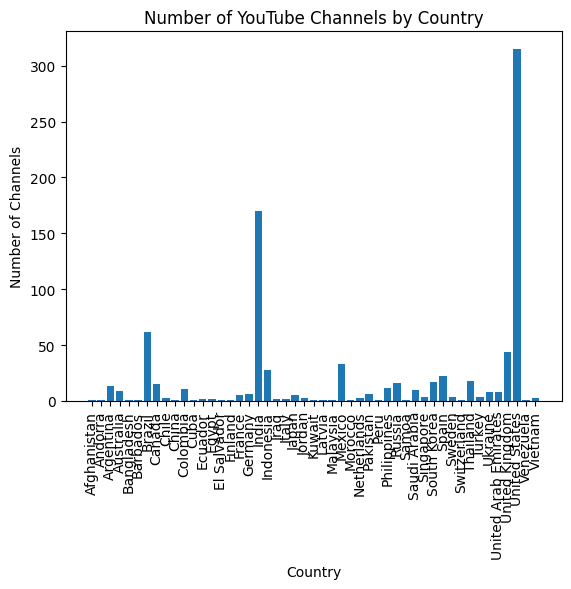

In [24]:

countries = yt['Country'].unique()
countries = [country for country in countries if pd.notna(country)]
countries.sort()
channel_count_by_country = yt.groupby('Country')['Youtuber'].count()
gross_edu_by_country = yt.groupby('Country')['Gross tertiary education enrollment (%)'].mean()

plt.bar(countries, gross_edu_by_country)
plt.title('Gross Tertiary Education Enrollment by Country')
plt.xlabel('Country')
plt.ylabel('Gross Tertiary Education Enrollment (%)')
plt.xticks(rotation=90)
plt.show()
plt.bar(countries, channel_count_by_country)
plt.title('Number of YouTube Channels by Country')
plt.xlabel('Country')
plt.ylabel('Number of Channels')
plt.xticks(rotation=90)
plt.show()


#12. How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

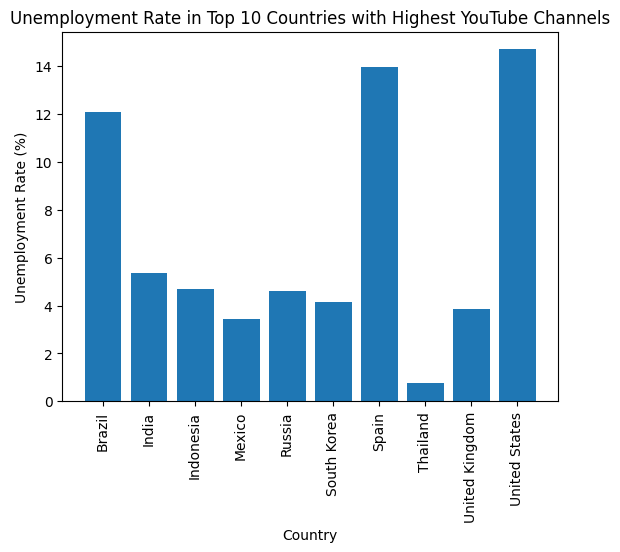

In [25]:
top_10_countries = yt.groupby('Country')['Youtuber'].count().sort_values(ascending=False).head(10).index
top_10_data = yt[yt['Country'].isin(top_10_countries)]
unemployment_rate_by_country = top_10_data.groupby('Country')['Unemployment rate'].mean()
plt.bar(unemployment_rate_by_country.index, unemployment_rate_by_country.values)
plt.title('Unemployment Rate in Top 10 Countries with Highest YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()


#13. What is the average urban population percentage in countries with YouTube channels?


In [26]:
avg_urban_population_by_country = yt.groupby('Country')['Urban_population'].mean().dropna()
print(avg_urban_population_by_country)

Country
Afghanistan               9797273.0
Argentina                41339571.0
Australia                21844756.0
Bangladesh               60987417.0
Barbados                    89431.0
Brazil                  183241641.0
Canada                   30628482.0
Chile                    16610135.0
China                   842933962.0
Colombia                 40827302.0
Cuba                      8739135.0
Ecuador                  11116711.0
Egypt                    42895824.0
El Salvador               4694702.0
Finland                   4716888.0
France                   54123364.0
Germany                  64324835.0
India                   471031528.0
Indonesia               151509724.0
Iraq                     27783368.0
Italy                    42651966.0
Japan                   115782416.0
Jordan                    9213048.0
Kuwait                    4207083.0
Latvia                    1304943.0
Malaysia                 24475766.0
Mexico                  102626859.0
Morocco             

#14. Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

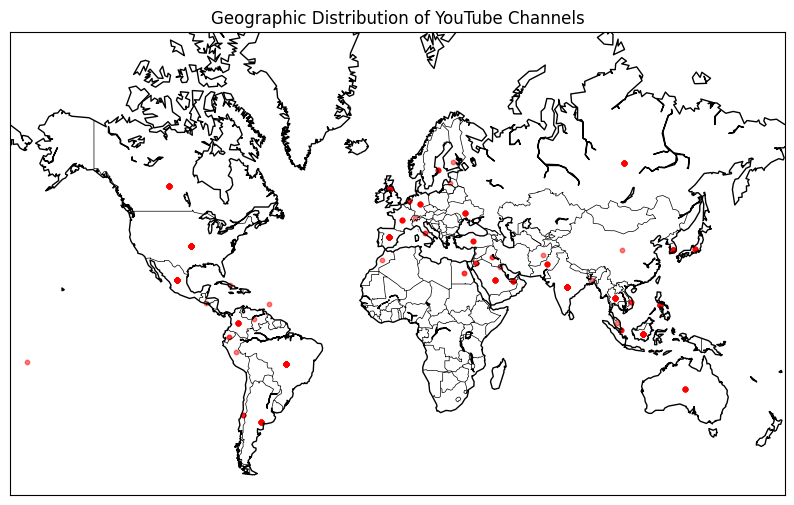

In [27]:
from mpl_toolkits.basemap import Basemap
latitudes = yt['Latitude'].dropna()
longitudes = yt['Longitude'].dropna()
plt.figure(figsize=(10, 7))
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
x, y = m(longitudes.values, latitudes.values)
m.scatter(x, y, marker='o', color='red', s=10, alpha=0.5)
plt.title('Geographic Distribution of YouTube Channels')
plt.show()

#15. What is the correlation between the number of subscribers and the population of a country?

In [28]:
correlation = yt['subscribers'].corr(yt['Population'])
print("Correlation between no. of subscribers and the population : ",correlation)


Correlation between no. of subscribers and the population :  0.0827925967357788


#16. How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

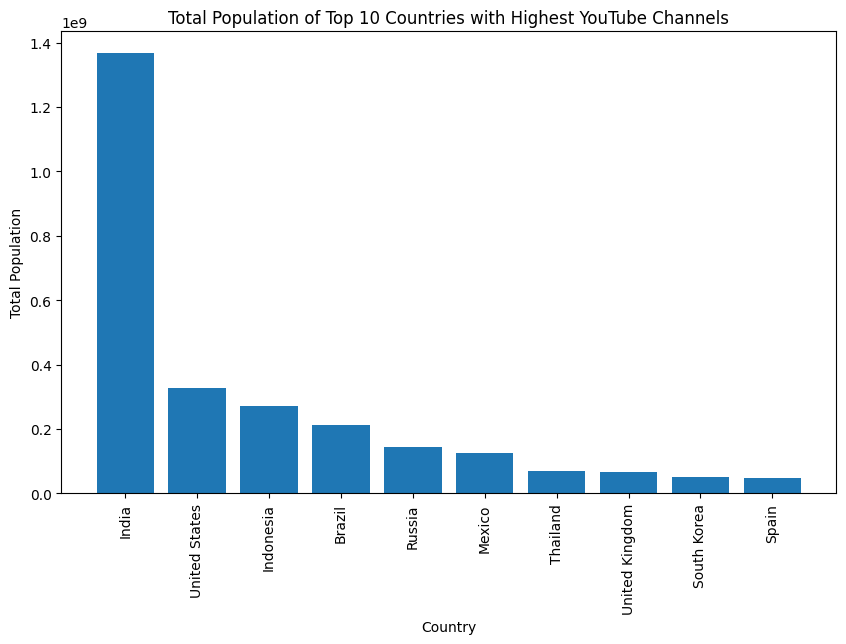

In [29]:
top_10_countries = yt.groupby('Country')['Youtuber'].count().sort_values(ascending=False).head(10).index
top_10_data = yt[yt['Country'].isin(top_10_countries)]
population_by_country = top_10_data.groupby('Country')['Population'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(population_by_country.index, population_by_country.values)
plt.title('Total Population of Top 10 Countries with Highest YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.xticks(rotation=90)
plt.show()


#17. Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

In [30]:
correlation = yt['subscribers_for_last_30_days'].corr(yt['Unemployment rate'])
print("Correlation between subscribers gained in the last 30 days and unemployment rate:", correlation)


Correlation between subscribers gained in the last 30 days and unemployment rate: -0.02203138194323437


#18. How does the distribution of video views for the last 30 days vary across different channel types?

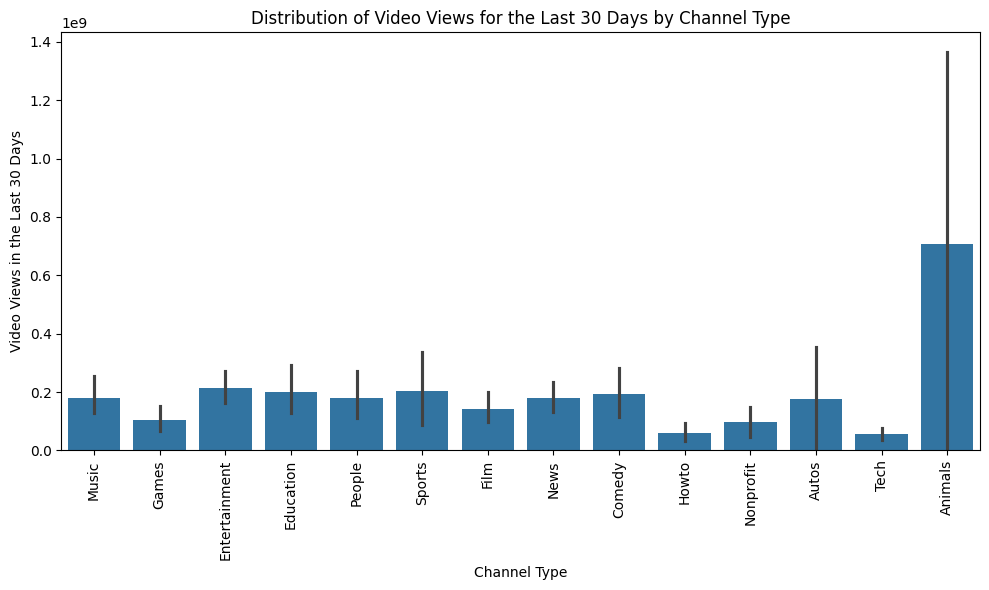

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='channel_type', y='video_views_for_the_last_30_days', data=yt)
plt.xticks(rotation=90)
plt.title('Distribution of Video Views for the Last 30 Days by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Video Views in the Last 30 Days')
plt.tight_layout()
plt.show()


#19. Are there any seasonal trends in the number of videos uploaded by YouTube channels?

<ipython-input-32-fe11e6a8ce10>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=upload_trend.index, y=upload_trend.values, palette='viridis')


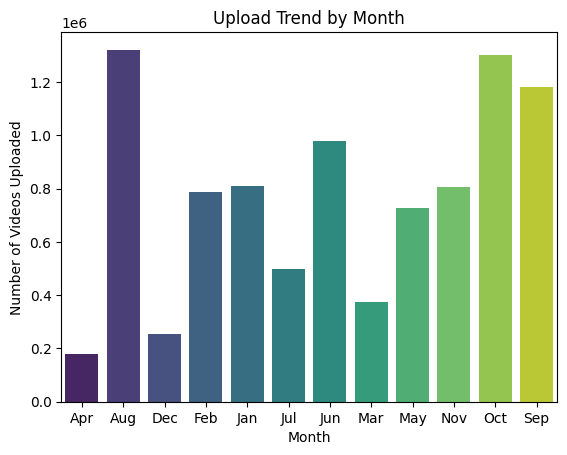

In [32]:
upload_trend = yt.groupby(yt['created_month'])['uploads'].sum()
sns.barplot(x=upload_trend.index, y=upload_trend.values, palette='viridis')
plt.title('Upload Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Videos Uploaded')
plt.show()

#20. What is the average number of subscribers gained per month since the creation of YouTube channels till now?

<ipython-input-34-a303a250a0db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_subscribers_gained_per_month.index, y=avg_subscribers_gained_per_month.values, palette='plasma')


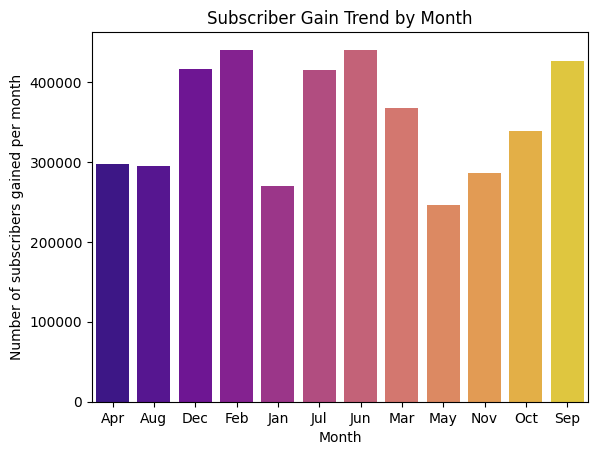

In [34]:
avg_subscribers_gained_per_month = yt.groupby(yt['created_month'])['subscribers_for_last_30_days'].mean()
sns.barplot(x=avg_subscribers_gained_per_month.index, y=avg_subscribers_gained_per_month.values, palette='plasma')
plt.title('Subscriber Gain Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of subscribers gained per month')
plt.show()